In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
# Set the path to the data and output folders
from pathlib import Path
DATA_PATH = Path(r"C:\Users\phil7\OneDrive\Code\_data")
OUTPUT_PATH = Path(r"C:\Users\phil7\OneDrive\Code\_output")

In [3]:
# Load the data
prices = pd.read_csv(DATA_PATH / 'dc' / 'small_portfolio.csv', index_col='date', parse_dates=True)
# Calculate daily returns
returns = prices.pct_change().dropna()
# Descriptive statistics
descriptive_stats = returns.describe()
descriptive_stats.loc['skew'] = returns.skew()
descriptive_stats.loc['kurt'] = returns.kurtosis()  # excess kurtosis
descriptive_stats

,GE,JPM,MSFT,PG
count,812.000000,812.000000,812.000000,812.000000
mean,-0.000675,0.000769,0.000907,-0.000144
std,0.013563,0.013662,0.014704,0.009087
min,-0.071742,-0.069477,-0.092534,-0.040065
25%,-0.007180,-0.005547,-0.005259,-0.004513
50%,-0.000329,0.000474,0.000368,-0.000124
75%,0.005899,0.007627,0.007289,0.004569
max,0.108045,0.083286,0.104522,0.037104
skew,0.177313,0.018815,0.515431,-0.259934
kurt,7.766370,3.831448,9.882177,2.848092


In [4]:
prices

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,25.06,62.49,46.760,90.44
2015-01-05,24.60,60.55,46.325,90.01
2015-01-06,24.07,58.98,45.650,89.60
2015-01-07,24.08,59.07,46.230,90.07
2015-01-08,24.37,60.39,47.590,91.10
...,...,...,...,...
2018-03-21,13.88,114.74,92.480,77.04
2018-03-22,13.35,109.95,89.790,76.41
2018-03-23,13.07,107.01,87.180,75.91


In [5]:
prices_rebased = prices.div(prices.iloc[0])*100
prices_rebased

,GE,JPM,MSFT,PG
date,,,,
2015-01-02,100.000000,100.000000,100.000000,100.000000
2015-01-05,98.164405,96.895503,99.069718,99.524547
2015-01-06,96.049481,94.383101,97.626176,99.071207
2015-01-07,96.089385,94.527124,98.866553,99.590889
2015-01-08,97.246608,96.639462,101.775021,100.729766
...,...,...,...,...
2018-03-21,55.387071,183.613378,197.775877,85.183547
2018-03-22,53.272147,175.948152,192.023097,84.486953
2018-03-23,52.154828,171.243399,186.441403,83.934100


In [6]:
returns.head(2)

,GE,JPM,MSFT,PG
date,,,,
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555


In [7]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [8]:
# compute the portfolio return with daily rebalancing, then with monthly rebalancing and finally without rebalancing
# compute the portfolio return with daily rebalancing
portfolio_return_daily = returns.mul(weights, axis=1).sum(axis=1)
portfolio_return_daily.head()

date
2015-01-05   -0.015865
2015-01-06   -0.016650
2015-01-07    0.004973
2015-01-08    0.018811
2015-01-09   -0.012269
dtype: float64

In [9]:
# compute the portfolio return with monthly rebalancing
portfolio_return_monthly = returns.resample('M').apply(lambda x: (x+1).prod() - 1).mul(weights).sum(axis=1)
portfolio_return_monthly.head()

C:\Users\phil7\AppData\Local\Temp\ipykernel_55484\1177236546.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  portfolio_return_monthly = returns.resample('M').apply(lambda x: (x+1).prod() - 1).mul(weights).sum(axis=1)


date
2015-01-31   -0.095121
2015-02-28    0.077537
2015-03-31   -0.041790
2015-04-30    0.075622
2015-05-31   -0.000957
Freq: ME, dtype: float64

In [10]:
returns.head(2)

,GE,JPM,MSFT,PG
date,,,,
2015-01-05,-0.018356,-0.031045,-0.009303,-0.004755
2015-01-06,-0.021545,-0.025929,-0.014571,-0.004555


In [11]:
# Create a data variable from the first four columns of the prices DataFrame
data = prices.iloc[:, :4]

# Get percentage daily returns
daily_returns = data.pct_change()

# Assign portfolio weights
weights = np.array([0.05, 0.4, 0.3, 0.25])

# Calculate the covariance matrix 
cov_matrix = (daily_returns.cov())*250

# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

# Print the result
print(str(np.round(port_variance, 4) * 100) + '%')

2.55%


In [12]:
# Calculate the standard deviation by taking the square root
port_standard_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Print the results 
print(str(np.round(port_standard_dev, 4) * 100) + '%')

15.959999999999999%


In [13]:
# Load the data
sp500_value = pd.read_csv(DATA_PATH / 'dc' / 'sp500.csv', index_col='date', parse_dates=True)
rfr = 0

In [14]:
sp500_value

,S&P500
date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893
...,...
2019-03-13,2810.919922
2019-03-14,2808.479980
2019-03-15,2822.479980


In [15]:
sp500_value = sp500_value['S&P500']

In [16]:
# Calculate total return and annualized return from price data 
total_return = (sp500_value[-1] - sp500_value[0]) / sp500_value[0]

# Annualize the total return over 4 year 
annualized_return = ((1 + total_return)**(1/4))-1

# Create the returns data 
returns_sp500 = sp500_value.pct_change()

# Calculate annualized volatility from the standard deviation
vol_sp500 = returns_sp500.std() * np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) / vol_sp500)
print (sharpe_ratio)

0.6105038859521851


C:\Users\phil7\AppData\Local\Temp\ipykernel_55484\2101884863.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (sp500_value[-1] - sp500_value[0]) / sp500_value[0]


In [17]:
# Load the data
pf = pd.read_csv(DATA_PATH / 'dc' / 'sp500.csv', index_col='date', parse_dates=True)
rfr = 0
pf

,S&P500
date,
2015-01-02,2058.199951
2015-01-05,2020.579956
2015-01-06,2002.609985
2015-01-07,2025.900024
2015-01-08,2062.139893
...,...
2019-03-13,2810.919922
2019-03-14,2808.479980
2019-03-15,2822.479980


In [18]:
# last date and first date of pf
pf.index[-1] -  pf.index[0]
#timedelta in month
(pf.index[-1] -  pf.index[0]).days/30

51.233333333333334

In [19]:
# Calculate total return and annualized return from price data 
total_return = (pf.iloc[-1] - pf.iloc[0]) / pf.iloc[0]

# Annualize the total return over 4 year
months = (pf.index[-1] -  pf.index[0]).days/30
annualized_return = ((1 + total_return)**(12/months))-1

# Create the returns data 
pf_returns = pf.pct_change()

# Calculate annualized volatility from the standard deviation
vol_pf = pf_returns.std()*np.sqrt(250)

# Calculate the Sharpe ratio 
sharpe_ratio = ((annualized_return - rfr) /vol_pf)
print (sharpe_ratio)

S&P500    0.570517
dtype: float64


In [20]:
# Create a downside return column with the negative returns only
df = pf_returns.copy()
target = 0
df


,S&P500
date,
2015-01-02,NaN
2015-01-05,-0.018278
2015-01-06,-0.008893
2015-01-07,0.011630
2015-01-08,0.017888
...,...
2019-03-13,0.006950
2019-03-14,-0.000868
2019-03-15,0.004985


In [21]:
df < target

,S&P500
date,
2015-01-02,False
2015-01-05,True
2015-01-06,True
2015-01-07,False
2015-01-08,False
...,...
2019-03-13,False
2019-03-14,True
2019-03-15,False


In [22]:
downside_returns = df[df < target]

# Calculate expected return and std dev of downside
expected_return = df.mean()
down_stdev = downside_returns.std()

# Calculate the sortino ratio
sortino_ratio = (expected_return - rfr)/down_stdev

# Print the results
print("Expected return  : ", expected_return*100)
print("Downside risk   : ", down_stdev*100)
print("Sortino ratio : ", sortino_ratio)

Expected return  :  S&P500    0.0339
dtype: float64
Downside risk   :  S&P500    0.685991
dtype: float64
Sortino ratio :  S&P500    0.049418
dtype: float64


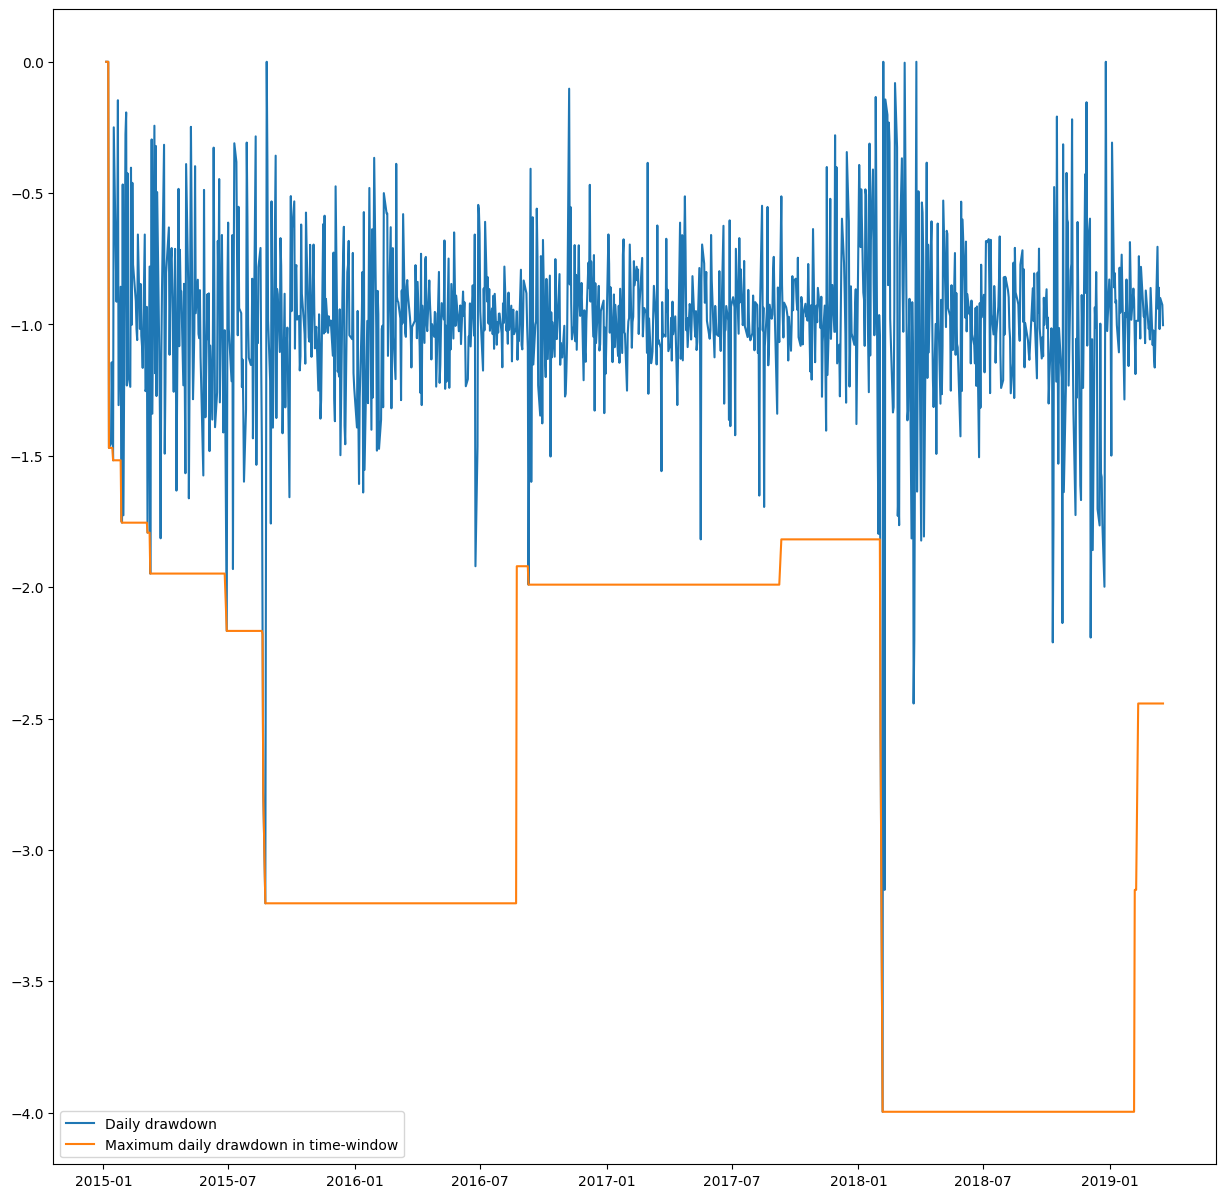

In [23]:
# Calculate the max value 
roll_max = df.rolling(center=False,min_periods=1,window=252).max()

# Calculate the daily draw-down relative to the max
daily_draw_down = df/roll_max - 1.0

# Calculate the minimum (negative) daily draw-down
max_daily_draw_down = daily_draw_down.rolling(center=False,min_periods=1,window=252).min()

# Define date
date = df.index

# Plot the results
plt.figure(figsize=(15,15))
plt.plot(date, daily_draw_down, label='Daily drawdown')
plt.plot(date, max_daily_draw_down, label='Maximum daily drawdown in time-window')
plt.legend()
plt.show()